# Statistics

## What is Statistics?

Statistics is a way to get **information** from **data**:

$$\text{Data} \to \text{Information}$$

Statistics is a **tool** for creating an **understanding** from a set of numbers.

Statistics is the science of **changing your mind** under uncertainty ([Cassie Kozyrkov: Statistics for People in a hurry](https://towardsdatascience.com/statistics-for-people-in-a-hurry-a9613c0ed0b)).

### Terminology

**Population**: The collection of all items that we are interested in (typically very large, sometimes infinite).

**Sample**: Subset of the population (typically large, but less than the population). The sample is the **data you have** and the population is the data you _wish_ you had.

**Statistic**: Descriptive measure of the sample (statistic and the discipline of statistics are different things).

**Parameter**: Desriptive measure of the population. A parameter summarizes the population for you. It is typically denoted with $\theta$.

![a sample is a subset of a population](images/subset.svg)

Suppose you are able to measure the population, then there is no uncertaintay, you have all the inforamtion — just calculate the average by using **analytics**. Then the statistic **is** the parameter because your sample is the population. You are dealing with **facts**, no complicated calculating is required.

**Observation**: A measurement from one single item in a sample.

**Experiment**: A procedure that can be infinitely repeated and has a well-defined set of possible outcomes, known as the sample space. An experiment is said to be random if it has more than one possible outcome, and deterministic if it has only one.

**Estimate**: best guess.

**Descriptive Statistics**: methods of organizing, summarizing, and presenting data in an informative way.

**Inferential Statistics**: methods used to draw conclusions or inferences about characteristics of populations based on data from a sample.

## Statistical Inference

Statistical inference is the process of making an estimate or prediction about a **population** based on a **sample**.

![inference from a sample](images/inference.svg)

What can we infer about a **population’s parameters** based on a **sample’s statistics**?

### Confidence and Significance Level

Statistical inferences are not always correct, therefore we definen a **confidence level** $1 - \alpha$ (proportion of times that an estimating procedure will be correct) and a **significance level** $\alpha$ (how frequently the conclusion will be wrong in
the long run):

$$\text{confidence level} + \text{significance level} = 1$$

# Descriptive Statistics

Typical methods of collecting data for statistical analysis are:

1. Direct Observation
2. Experiments
3. Surveys



## Meassure Data

In statistics, a **variable** is an attribute of an object of study, also called **cases**.

Data is generally divided into two categories, **quantitative data** and **categorical data**.

**Categorical variables** represent **groupings** (sometimes as numbers). There are three types of categorical variables: **binary**, **nominal**, and **ordinal** variables.

* **Binary variables** represent Yes/No values, e.g. heads/tails in a coin flip.
* **Nominal variables** are groups with no rank or order, e.g. colors, species names.
* **Ordinal variables** are groups that are ranked in a specific order, e.g. scaled responses in a survey, finishing place in a race.


**Quantitative variables** represents **amounts** that can be added, subtracted, divided, etc. There are two types of quantitative variables, **discrete** and **continuous**.

* **Discrete Variables** are counts of individual items or values, e.g. number of students in a class or number of different tree species in a forest.
* **Continuous variables** (aka **ratio variables**) are measurements of continuous values, e.g. age, height or distance.

### Levels of Measurement

Levels of measurement tell you **how precisely variables are recorded**:

* **Nominal**: the data can only be categorized
* **Ordinal**: the data can be categorized and ranked
* **Interval**: the data can be categorized, ranked, and evenly spaced
* **Ratio**: the data can be categorized, ranked, evenly spaced, and has a natural zero.

### Data Matrix

A data matrix is the source of your statistical analysis: **rows** represent the **cases**, the objects of interest and **columns** represet the **variables**, the attributes of your objects. The values are called **observations**.

In this example our **cases** are persons and our **variables** are height (interval data), weight (interval data), age (interval data) and gender (nominal data).

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0) 
import matplotlib.pyplot as plt
import seaborn as sns

n = 100

var_height = 10 ** 2                  # variance of 'height'
mean_height = 170

var_weight = 8 ** 2                   # variance of 'weight'
mean_weight = 85

cov = 72                              # covaraince between 'height' and 'weight'

cov_matrix = [[var_height, cov],
              [cov, var_weight]]

df = pd.DataFrame(np.round(np.random.multivariate_normal([mean_height, mean_weight], cov_matrix, n), decimals=1), columns=['height', 'weight'])

df['age'] = np.random.randint(20, 31, n)                                          # discrete uniform distribution
df['gender'] = ['M' if x == 0 else 'F' for x in np.random.randint(0, 2, n)]       # discrete uniform distribution

df

,height,weight,age,gender
0,151.9,72.3,23,M
1,156.5,82.4,30,M
2,153.3,68.5,21,M
3,160.9,77.4,30,F
4,170.3,86.7,29,F
...,...,...,...,...
95,182.3,95.5,22,F
96,172.4,82.7,29,M
97,165.1,80.6,28,M
98,161.0,80.9,21,F


## Describe Data

If you want to present your analyses to other people, you make use of **summaries** of your data.

### Frequency Tables

Frequency tables show how data is **distributed** over the cases.

For **categorial data** this is done by summing up observations with the same value:

In [2]:
s = pd.crosstab(index=df['gender'], columns='observations')
s['percent'] = np.round(s / s.sum(), decimals=2)
s

col_0,observations,percent
gender,,
F,56,0.56
M,44,0.44


**Quantitative data** can be encoded to **categorial data** (with a lost of information).

In [3]:
df['height_bins'] = pd.cut(x=df['height'], bins=[130, 139, 149, 159, 169, 179, 189, 199])
df['weight_bins'] = pd.cut(x=df['weight'], bins=[50, 59, 69, 79, 89, 99, 109])

h = pd.crosstab(index=df['height_bins'], columns='observations')
h['percent'] = np.round(h / h.sum(), decimals=2)
h

col_0,observations,percent
height_bins,,
"(139, 149]",3,0.03
"(149, 159]",12,0.12
"(159, 169]",33,0.33
"(169, 179]",32,0.32
"(179, 189]",19,0.19
"(189, 199]",1,0.01


In [4]:
df

,height,weight,age,gender,height_bins,weight_bins
0,151.9,72.3,23,M,"(149, 159]","(69, 79]"
1,156.5,82.4,30,M,"(149, 159]","(79, 89]"
2,153.3,68.5,21,M,"(149, 159]","(59, 69]"
3,160.9,77.4,30,F,"(159, 169]","(69, 79]"
4,170.3,86.7,29,F,"(169, 179]","(79, 89]"
...,...,...,...,...,...,...
95,182.3,95.5,22,F,"(179, 189]","(89, 99]"
96,172.4,82.7,29,M,"(169, 179]","(79, 89]"
97,165.1,80.6,28,M,"(159, 169]","(79, 89]"
98,161.0,80.9,21,F,"(159, 169]","(79, 89]"


### Categorial Data

Using a **pie chart**, one can immediatelly see **percentage**. Using a **bar chart**, one can easily retrieve **exact numbers**. A bar chart has advantanges in favor of a pie chart if the nuber of categories increases.

The **center of a distribution** can be described by the **mode**. The mode is the value which appears **most frequently** (can immediatelly been seen using a pie-chart). There can be multiple modes.

In [5]:
df.mode()

,height,weight,age,gender,height_bins,weight_bins
0,160.9,87.5,21,F,"(159.0, 169.0]","(79.0, 89.0]"
1,177.1,NaN,24,NaN,NaN,NaN


### Quantitative Data

For a small sample, use a **dotplot**, for many observations, use a **histogram**.

The **center of a distribution** can be described by the **median** or the **mean**. 

#### Median

The median is the middle value of your observations when they are ordered from the smallest to the largest. Use the median if you have outliers. 

In [6]:
df[["height", "weight", "age"]].median()

height    170.1
weight     85.9
age        25.0
dtype: float64

#### Mean

The **mean** $\mu$ or $\overline{x}$ is the sum of all the values divided by the number of observation ${x_1, x_2, ..., x_N}$ (sample size):

$$\mu = \overline{x} = \frac{1}{N}\displaystyle\sum_{i=1}^{N} x_i$$

In [7]:
df[["height", "weight", "age"]].mean()

height    169.771
weight     85.321
age        24.990
dtype: float64

#### Standard Deviation

The **variance** is 

$$\text{var}(X)= s = \frac{1}{n-1}\displaystyle\sum_{i=1}^{n} \left( x_i - \overline{x} \right)^2$$

and the **standard deviation** $\sigma$ is 

$$\sigma = \sqrt{s}$$

The differences of the mean from the actual values are squared to prevent positive and negative deviations from neutralizing each other. As a result, the unit of the **variance** is squared which may result in a bad interpretation, e.g. the variance of a length is an area. Therefore we use the square-root of the variance as **standard variation** in order to have correct dimensions.

In [8]:
df[["height", "weight", "age"]].var()

height    104.652181
weight     68.293595
age         9.747374
dtype: float64

In [9]:
df[["height", "weight", "age"]].std()

height    10.229965
weight     8.263994
age        3.122078
dtype: float64

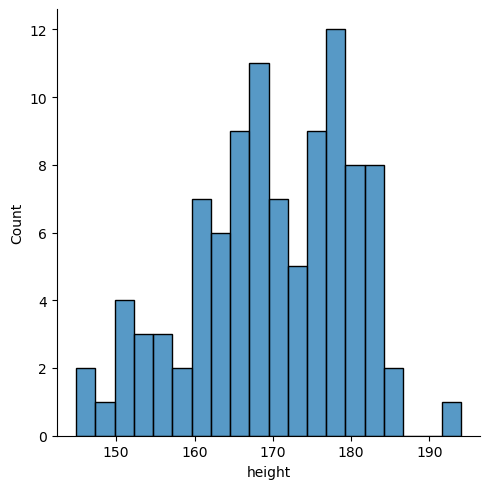

In [10]:
sns.displot(df.height, bins=20);

#### Standardization with z-Score

In order to find out if a **specific observation** is **common** or **exceptional**, we calculate the **z-score** or **standard score**:

$$z = \frac{x-\mu}{\sigma}$$

The **relative deviation** is normalized to the standard deviation with $\mu = 0$ and $\sigma = 1$.

If the histogram of your variable is bell shaped, then

* **68%** of the observations fall between z-scores **-1** and **1**
* **95%** between z-scores of **-2** and **2**
* **99%** between z-scores of **-3** and **3**

This means that for a bell shaped distribution, a **z-score** of more than 3 or less than -3 can be conceived of as rather **exceptional**.

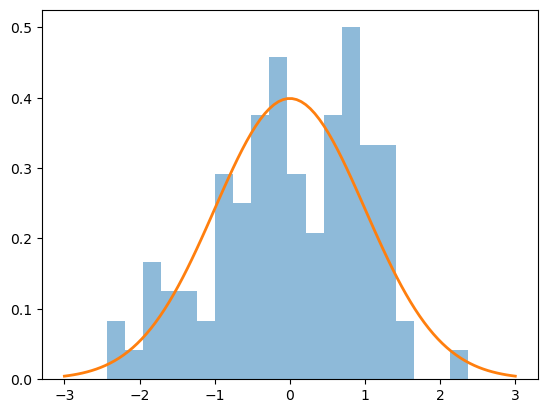

In [11]:
from scipy.stats import norm

mu = df.height.mean()
sigma = df.height.std()
z = (df.height - mu) / sigma
plt.hist(z, bins=20, alpha=0.5, density=True)

x = np.linspace(-3, 3, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, linewidth=2);

A rule that applies to any distribution regardless of its shape shape, is that 

* **75%** of the data must lie within a z-score of **±2**
* **89%** within a z-score of **±3**.

So in itself a z-score gives you, to a certain extent, information about how extreme an observation is.

#### Quantiles

The **variability of a distribution** can be described by the **range**. The range is the difference between the highest and the lowest value. 

More feasible for describing the variability is the **interquartile range**, as it leaves out the extreme values. the interquartile range divides your distribution into **four equal parts**. The three dividers are called first quartile $\text{Q1}$, second quartile $\text{Q2}$ and third quartile $\text{Q3}$. 

The **first quartile** $\text{Q1}$ (lower quartile) is equal to the **25th percentile** of your sample.

The **second quartile** $\text{Q2}$ is the same as the **median** of your sample.

The **third quartile** $\text{Q3}$ (upper quartile) is equal to the **75th percentile** of your sample

The **interquartile range** $\text{IQR} = \text{Q3} - \text{Q1}$ is not affected by outliers.

As a rule of thumb, observations can be qualified as **outliers** if

$$x_{LO} < \text{Q1} - 1.5 \cdot \text{IQR} \quad \text{or} \quad x_{RO} > \text{Q3} + 1.5 \cdot \text{IQR}$$

In [12]:
import numpy as np

x = np.array([0,1,2,3,4,5,6,7,8,9,10])
np.percentile(x, [25, 50, 75], method='midpoint')

array([2.5, 5. , 7.5])

In [13]:
iqr = np.percentile(x, 75) - np.percentile(x, 25)
iqr

5.0

#### Box Plot

![boxplot](images/boxplot.svg)

The box plot is very useful for describing center and variability, and detecting outliers.

The box plot shows you at a glance

* the **maximum** value that is not an outlier:  $\text{Q3} + 1.5 \cdot \text{IQR}$
* $\text{Q3}$
* $\text{Q2}$ or the **median**
* $\text{Q1}$
* the **minimum** value that is not an outlier:  $\text{Q1} - 1.5 \cdot \text{IQR}$
* the **outliers**

In [14]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(5)

data2 = np.random.normal(5, 3, 100)
data1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

print('data 2:')
iqr = np.percentile(data2, 75) - np.percentile(data2, 25)
print(f'  IQR:                 {np.round(iqr, 2)}')
print(f'  Max (data):          {np.round(np.max(data2), 2)}')
print(f'  Max (not outlier):   {np.round(np.percentile(data2, 75) + 1.5 * iqr, 2)}')
print(f'  Q3 (75%):            {np.round(np.percentile(data2, 75), 2)}')
print(f'  Q2 (50% / Median):   {np.round(np.percentile(data2, 50), 2)}')
print(f'  Mean:                {np.round(np.mean(data2), 2)}')
print(f'  Q1 (25%):            {np.round(np.percentile(data2, 25), 2)}')
print(f'  Min (not outlier):   {np.round(np.percentile(data2, 25) - 1.5 * iqr, 2)}')
print(f'  Min (data):          {np.round(np.min(data2), 2)}')
print(f'  Standard Deviation:  {np.round(np.std(data2), 2)}')
print(f'  Variance:            {np.round(np.var(data2), 2)}')

data 2:
  IQR:                 3.72
  Max (data):          12.29
  Max (not outlier):   12.84
  Q3 (75%):            7.26
  Q2 (50% / Median):   4.81
  Mean:                5.27
  Q1 (25%):            3.54
  Min (not outlier):   -2.04
  Min (data):          -3.58
  Standard Deviation:  2.79
  Variance:            7.8


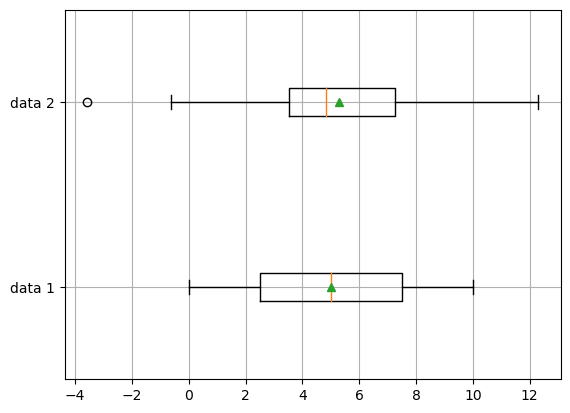

In [15]:
plt.boxplot([data1, data2], vert=0, showmeans=True, whis=1.5, labels=['data 1', 'data 2'])
plt.grid();

# Probability

**Probability** is just a measure of the **likelihood** of some set of events happening.

The **theory of probability** allows the transition from random samples to the population.

A **random experiment** $E$ is an process that leads to one of many possible **outcomes**. The set of possible outcomes is called the **sample space**:

$$S = \{ O_1, O_2, \dotsc \}$$

An **event** $A$ is the set of one or more simple events in a sample space. A **simple event** is an individual outcome in the sample space.

Two events are **mutually exclusive** when they have no common elements, i.e. $A \cap B = \emptyset$. Two sets are **non-mutually exclusive** if they share common elements. Knowing whether two events are mutually exclusive influences the calculation of the probability that one or the other occurs.

Two events are **independent** if the occurrence of one does not change the probability of the other occurring. Two events are **dependent**, we need to take into account what has already happened.

#### Examples

The experiment "_roll a dice_" has the sample space $S = \{1, 2, 3, 4, 5, 6\}$. Then the "_outcome of an odd number_" is an **event** $A = \{1, 3, 5\}$ and the "_outcome of 3_" is a **simple event** $B = \{3\}$. Also event $A$ and $B$ are **non-mutual exclusive** as they share the elements $\{3\}$.

The experiment "_flip a coin_" has the sample space $S = \{ \text{head}, \text{tail} \}$. Then the events $A = \{ \text{head} \}$ and $B = \{ \text{tail} \}$ are **mutually exclusive**.

The experiment "_draw one colored ball from an urn and place back, then repeat_" has the sample space $S = \{ \text{red}, \text{blue} \}$. Then the events $A = \{ \text{first is red} \}$ and $B = \{ \text{second is blue} \}$ are **independent**.

The experiment "_draw colored balls from an urn without placing back_" has the sample space $S = \{ \text{red}, \text{blue} \}$. Then the events $A = \{ \text{first is red} \}$ and $B = \{ \text{second is blue} \}$ are **dependent**.

## Assigning Probabilities to Events

Probabilities are assigned with three approaches:

1. Classical approach
2. Relative frequency approach
3. Subjective approach

### Classical (axiomatic) approach

This approach states that the way to handle $P$ is to define a **mathematical function**, called a **probability measure**, on the sample space. Probability measures satisfy certain axioms and have special mathematical properties, so not just any mathematical function will do.

If an experiment has $n$ simple outcomes, this method would assign a probability of $1/n$ to each outcome.

#### Example

When rolling a die, $S = \{1, 2, \dots, 6\}$, then each simple event has a $1/6$ chance of occurring.

When rolling a die twice (assumption: the two rolls are **independent**), $S = \{(1, 1), (1, 2), \dots , (6, 6)\}$, then each simple event has a $1/6 \cdot 1/6 = 1/36$ chance of occurring.

### Relative-frequency approach

Probabilities are assigned on the basis of **experimentation** or historical data.

Let $n$ be the number of times an event $A$ _could have_ occurred in an experiment. Further, let $n_A$ be the number of times the event $A$ _did actually_ occur.

Then we _attempt_ to define $P(A)$ using the **relative frequency** as:

$$
P(A) = \lim_{n \to \infty} \frac{n_A}{n}
$$

The above can only be viewed as an attempt because it is not physically feasible to repeat an experiment an infinite number of times.

The mathematical underpinning of this approach is the **Law of Large Numbers** (LLN): 

$$
\lim_{n \to \infty} \sum_{i=1}^n \frac{X_i}{n} = \overline{X}
$$

The **average** of the results obtained from a large number of trials should be close to the **expected** value and tends to become closer to the expected value as more trials are performed.

#### Example

When rolling a die $S = \{1, 2, \dots, 6\}$, 100 times, let's suppose the number of times the outcome 1 is observed is 15. Thus, $A = \{1\}$, $n_A = 15$, and $n = 100$. 

Therefore, we say that 

$$P(A) = P(\{1\}) \approx 15/100 = 0.15$$

### Subjective approach

The subjective approach interprets probability as the experimenter’s degree of belief that the event will occur. The estimate of the probability of an event is based on the totality of the individual’s knowledge at the time. As new information becomes available, the estimate is modified accordingly to best reflect his/her current knowledge.

We define probability as the degree of **belief** that we hold in the occurrence of an event. Thus, **judgment** is used as the basis for assigning probabilities.

Notice that the classical approach of assigning equal probabilities to simple events is, in fact, also based on judgment. What is somewhat different here is that the use of the subjective approach is usually limited to experiments that are **unrepeatable**.

#### Example

Consider a horse race with 8 horses running. What is the probability for a particular horse to win? 

It is not reasonable to assume that the probability is $1/8$. Also we can’t apply the relative-frequency approach.

Having different judgments is what makes **betting** possible: People place bets on the outcomes of such **onetime experiments** based on their judgment how likely it is for a particular horse to win.

## Probability Rules

Given a **sample space** $S = \{ O_1, O_2, \dotsc \}$, then the **probabilities** assigned to events must satisfy these requirements:

The probability of any **event** must be non-negative:

$$P(O_i) \geq 0$$

The probability of the entire **sample space** must be 1:

$$P(S) = 1$$

### Intersection / Multiplication / Joint Probability

**Multi-step random experiments** are random experiments that consist of several steps that are also random experiments in themselves. A simple example is repeating a single random experiment several times. Multi-step random experiments can often be illustrated by **tree diagrams**.

TODO: https://www.siyavula.com/read/maths/grade-11/probability/10-probability-02

The **intersection** operation $\cap$ corresponds to "**and**".

#### Independent Events

Two events $A$ and $B$ are called (stochastically) **independent** of each other if the occurrence of one event does not change the probability of the occurrence of the other event.

If two events are **independent**, then the joint probability is

$$
P(A \cap B) = P(A) \cdot P(B)
$$

sometimes written as

$$
P(A, B) = P(A) \cdot P(B)
$$

Vice versa, two events are **independent** if and only if

$$
P(A \cap B) = P(A) \cdot P(B)
$$

If two events are **dependent**, then the joint probability is

$$
P(A \cap B) = P(A) \cdot P(B \mid A)
$$

Calculating **joint probabilities** can be visualized as multiplying probabilities along the branches of a **probability tree**:

![Probability Tree](images/probability-tree.svg)

If two events are **mutually exclusive** or **disjoint**, so only one of the events can happen at a time, then

$$
P(A \cap B) = \emptyset
$$

#### Example

Given a deck of 52 cards, what is the probability to pick a black five.

&rarr; The events $A = \{ \text{black} \}$ and $B = \{ \text{five} \}$ are **non-mutual exclusive** and **independent**, hence

$$
P(A \cap B) = P(A) \cdot P(B) = \frac{1}{2} \cdot \frac{4}{52} = \frac{1}{26}
$$

(there are two black fives in a deck of 52 cards, the five of spades and the five of clubs).

#### Example

Given a fair dice, what is the probability of drawing a number larger $3$ and a multiple of $3$?

&rarr; The events $A = \{ 4, 5, 6 \}$ and $B = \{ 3, 6 \}$ are **non-mutual exclusive**, hence can happen at the same time with a probability of:

$$
P(A \cap B) = \frac{1}{6}
$$

In a multi-step experiment, the probability is

$$
P(A) \cdot P(B) = \frac{1}{2} \cdot \frac{1}{3} = \frac{1}{6}
$$

hence $A$ and $B$ are **independent** events.

#### Example

Given a fair dice, what is the probability of drawing an even number larger $3$?

&rarr; The events $A = \{ 4, 5, 6 \}$ and $B = \{ 2, 4, 6 \}$ are **non-mutual exclusive**, hence can happen at the same time with a probability of:

$$
P(A \cap B) = P(\{ 4, 6\}) = \frac{2}{6} = \frac{1}{3}
$$

In a multi-step experiment, the probability is

$$
P(A) \cdot P(B) = \frac{3}{6} \cdot \frac{3}{6} = \frac{1}{2} \cdot \frac{1}{2}  = \frac{1}{4}
$$

hence $A$ and $B$ are **dependent** events.

### Union / Addition

The **union** operation $\cup$ corresponds to "**or**".

If two events are  **non-mutually exclusive** ("overlap"), then we must substract one of the overlapping events

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

If two events are **mutually exclusive**, then

$$P(A \cup B) = P(A) + P(B)$$

If $A$ is a subset of $B$, that is $A \subset B$, then

$$P(A \cup B) = P(B)$$

#### Example

A box contains 2 red, 4 green, 5 blue and 3 yellow balls. If a single random ball is chosen, what is the probability that it is red or green?

&rarr; The events $A = \{ \text{red} \}$ and $B = \{ \text{green} \}$ are **mutual exclusive**, hence

$$
P(A \cup B) = P(A) + P(B) = \frac{2}{14} + \frac{4}{14} = \frac{3}{7}
$$

#### Example

In a math class are 17 boys and 13 girls. On a unit test, 4 boys and 5 girls made an `A` grade. If a student is chosen at random from the class, what is the probability of choosing a girl or an A-grade student?

&rarr; The events $A = \{ \text{girl} \}$ and $B = \{ \text{A-grade} \}$ are **non-mutual exclusive** since a stundent can be a girl and an A-grade student, hence

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B) = \frac{13}{30} + \frac{9}{30} - \frac{5}{30} = \frac{17}{30}
$$



### Complement

Let $A$ be an event. The **complement** $A^C$ is the event that $A$ does **not** occur.

Then

$$
\begin{align}
A \cap A^C &= \emptyset \\
A \cup A^C &= S \\[10pt]
P(A^C) &= 1 − P(A)
\end{align}
$$

### Conditional Probability

The **dependent** probability of an event $A$, **given** event $B$ has occured, is defined as

$$P(A \mid B) = \frac{P(A \cap B)}{P(B)}$$

Only the "portion" of $A$ that is contained in $B$ could occur. Moreover, the original probability of $A \cap B$ must be recalculated to reflect the fact that the **new sample space** is $B$.

If two events $A$ and $B$ are **independent**, then

$$
\begin{align}
P(A \mid B) = P(A) \\
P(B \mid A) = P(B)
\end{align}
$$


## Bayes Theorem

See also [Bayes' Theorem with Lego](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego).

Bayes theorem describes the probability of an event, based on **prior knowledge** that might be related to the event. For example, if the risk of health problems is known to increase with age, Bayes theorem allows the risk to an individual of a known age to be assessed more accurately than simply assuming that the individual is typical of the population as a whole.

$$
\begin{aligned}
P(A|B) &= \frac{P(B|A) \cdot P(A)}{P(B)} \\[10pt]
\text{Posterior} &= \, \frac{\text{Likelihood} \cdot \text{Prior}}{\text{Evidence}}
\end{aligned}
$$

with

* the conditional probability $P(A|B)$ of event $A$ occurring given that $B$ is true. This is also called **posterior probability** (the revised or updated probability of an event occurring after taking into consideration new information).
* the conditional probability $P(B|A)$ of event $B$ occurring given that $A$ is true. This is also called the **likelyhood** (how likely a particular population is to produce an observed sample).
* the probability $P(A)$. This is also called the **prior probability** (the probability of an event before new evidence is introduced).
* the probability $P(B)$. This is also called the **evidence** which **normalizes** our probabilities.

If we are only interested in **proportions** of conditional probabilities, we can also write

$$
\begin{aligned}
P(A|B) &\propto P(B|A) \cdot P(A) \\[10pt]
\text{Posterior} &\propto \, \text{Likelihood} \cdot \text{Prior}
\end{aligned}
$$

### Alternative Form

Another form of Bayes theorem for **two competing statements** or hypotheses is

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)}
$$

For proposition $A$ and evidence or background $B$,

* $P(A)$ is the prior probability, the initial degree of belief in $A$.
* $P(\neg A)$ is the corresponding initial degree of belief in not $A$, that $A$ is false, where $P(\neg A) = 1 - P(A)$
* $P(B|A)$ is the conditional probability or likelihood, the degree of belief in $B$ given that proposition $A$ is true.
* $P(B|\neg A)$ is the conditional probability or likelihood, the degree of belief in $B$ given that proposition $A$ is false.
* $P(A|B)$ is the posterior probability, the probability of $A$ after taking into account $B$.

#### Example

Knowing a medical test having a **99% accuracy** (for true positives and true negatives). Already knowing that **1 out of 10000 people are sick**, what is the probability of an individual being sick, given that this individual got a positive test result?

![false-positives](images/bayes-theorem.svg)

What we knew before we knew the test is positive, is the **prior probability** $P(sick) = 0.0001$ and $P(healthy) = 0.9999$. 

As only the **positive tests** actually occured, we scale the likelyhood and the prior with the **evidence** $P(positive)$:

$$
\begin{align}
P(positive) &= P(sick) \cdot P(positive|sick) + P(healthy) \cdot P(positive|healthy) \\[10pt]
&= P(sick) \cdot \text{Sensitivity} + (1 - P(sick)) \cdot (1 - \text{Specificity})
\end{align}
$$

In [16]:
# P(sick)
p_sick = 0.0001

# P(~sick) or P(healthy)
p_healthy = 1 - p_sick

# Sensitivity or P(positive|sick)
p_positive_sick = 0.99

# Specificity or P(positive|healthy)
p_positive_healthy = 1 - p_positive_sick

# P(positive)
p_positive = (p_sick * p_positive_sick) + (p_healthy * p_positive_healthy)

print(f'The probability of getting a positive test result P(positive) is: {p_positive:.4f}')

The probability of getting a positive test result P(positive) is: 0.0101


The **posterior probability**, what we infered after we knew that the test is positive, is:

$$
\begin{align}
P(sick|positive) &= \frac{P(sick) \cdot P(positive|sick)}{P(positive)} \\[10pt]
&= \frac{P(sick) \cdot P(positive|sick)}{P(sick) \cdot P(positive|sick) + P(healthy) \cdot P(positive|healthy)} \\[10pt]
&= \frac{0.0001 \cdot 0.99}{0.0001 \cdot 0.99 + 0.9999 \cdot 0.01} \\[10pt]
&= 0.0098 \approx 1 \%
\end{align}
$$

In [17]:
p_sick_positive = p_sick * p_positive_sick / p_positive
print(f'The posterior probability of being sick having a positive test result is: {p_sick_positive:.4f}')

p_healthy_positive = p_healthy * p_positive_healthy / p_positive
print(f'The posterior probability of being healthy having a positive test result is: {p_healthy_positive:.4f}')

The posterior probability of being sick having a positive test result is: 0.0098
The posterior probability of being healthy having a positive test result is: 0.9902


In [18]:
print(f'{(p_sick_positive + p_healthy_positive):.4f}')

1.0000


# Random Variables

A **random variable** $X$ (e.g. _length_) is a variable whose possible values $x_1, x_2, \dots, x_n$ are numerical outcomes of a random phenomenon.

A random variable is **discrete** if it can take only a countable number of distinct values, and it is **continuous** if it can take an infinite number of possible values.

A **probability distribution** specifies the probabilities for each of the values that the random variable may take. 

A probability distribution of a **discrete** random variable is called a **probability mass function** and gives probabilities on the y-axis. 

A probability distribution for a **continuous** random variable is called a **probability density function** and it gives probability densities on the y-axis. In this case, probabilities are given by the surface area under the curve within a specified interval.

## The Mean and Variance of a Random Variable

### Mean of a Random Variable

The **mean** $\mu_x$, or **expected value** $E(X)$, of a **descrete random variable**, is the sum of all values the variable may take times their probabilities:

$$\mu_x = E(X) = \sum_i x_i \, p_i = \sum_i x_i \, P(X = x_i)$$

The mean of a **continuous random variable** is 

$$\mu_x = E(x) = \int_{\infty}^{\infty} x f(x) \; \mathrm{d}x$$

If the random variable is changing by **multiplication** or addition of a **constant**, then the mean is changing accordingly:

$$\mu_{a + bx} = a + b \mu_x$$ 

The mean of several random variables **added** together is the sum of their means, even if the different variables are not statistically independent:

$$\mu_{x + y} = \mu_x + \mu_y$$ 

### Variance of a Random Variable

The **variance** $\text{var}(X) = \sigma^2 $ of a random variable $X$ is defined as the expected value of the squared deviation of $X$ from its mean $\mu$:

$$
\text{var}(X) = \sigma^2 = E((X-\mu)^2) = \sum_i (x_i - \mu)^2 \, p_i = \sum_i (x_i - \mu)^2 \, P(X = x_i)
$$

and the **standard deviation** $\sigma$ of a random variable is 

$$
\sigma = \sqrt{\text{var}(X)}
$$

**Adding** or **substracting** a **constant** to a random variable doesn't change its variance:

$$\text{var}(a \pm X) = \text{var}(X)$$

But **multiplication with a constant** leads to multiplication of the variance with the squared constant:

$$\text{var}(a \cdot X) = a^2 \; \text{var}(X)$$

and

$$\sigma(a \cdot X) = a \cdot \sigma(X)$$

For random variables $X$ and $Y$, the variance of the sum is the sum of the separate variances plus two times the covariance between $X$ and $Y$:

$$\text{var}(X \pm Y) = \text{var}(X) + \text{var}(Y) \pm 2 \text{cov}(X, Y)$$

If the random variables are **uncorrelated**, then the sum of the variances is:

$$\text{var}(X \pm Y) = \text{var}(X) + \text{var}(Y)$$

and

$$\sigma(X \pm Y) < \sigma(X) + \sigma(Y)$$


# Probability Distributions

The **probability distribution** derives from **variance**.

## The Normal Distribution

The general form of a normal distributionits is the **probability density function** (pdf):

$$
f(x) = \frac{1}{\sigma {\sqrt {2\pi}}}  e^{-{\frac{1}{2}} \left( \frac{x - \mu}{\sigma} \right)^{2}}
$$

When a **random variable** $X$ is normally distributed with **mean** $\mu$ and **standard deviation** $\sigma$, one may write

$$X \sim \mathcal{N}(\mu, \sigma ^{2})$$

In statistics, the tilde $\sim$ has the meaning "*has the distribution (of)*":

For instance, $X \sim \mathcal{N}(0, 1)$ means "*the stochastic (random) variable $X$ has the distribution $\mathcal{N}(0, 1)$*.

If $X$ and $Y$ are stochastic variables then $X \sim Y$ means "*$X$ has the same distribution as $Y$*".

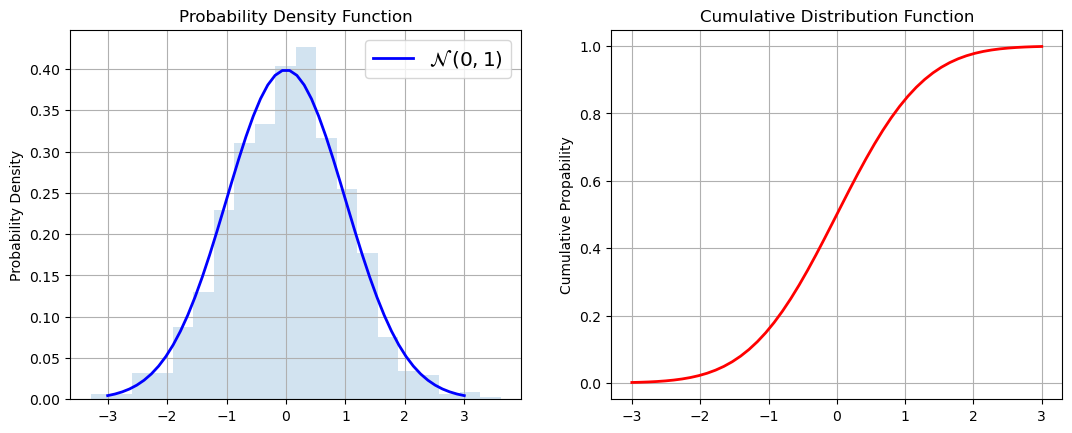

In [19]:
from scipy.stats import norm                     # normal continuous random variable

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3)                           # range from [-3, 3] 

loc = 0                                          # mean
scale = 1                                        # standard deviation

pdf = norm.pdf(x, loc, scale)                    # Probability density function
cdf = norm.cdf(x, loc, scale)                    # Cumulative distribution function

plt.figure(figsize=(12.8, 4.8))

plt.subplot(1,2,1) 
plt.grid()
plt.hist(norm.rvs(size=1000), bins=20, density=True, alpha=0.2)
plt.plot(x, pdf, linewidth=2, color="blue", label=r'$\mathcal{N}\,(0, 1)$')
plt.title('Probability Density Function')
plt.ylabel('Probability Density')
plt.legend(fontsize='x-large')

plt.subplot(1,2,2) 
plt.grid()
plt.title('Cumulative Distribution Function')
plt.ylabel('Cumulative Propability')
plt.plot(x, cdf, linewidth=2, color="red");

The area under the curve of the **probability density function** is $1$.

In a **cumulative distribution**, the mean $\mu$ is given at a probabiity of $0.5$, and $\sigma$ determines the steepness of the curve at $0$.

### Standard Normal Distribution

The distribution $\mathcal{N}\,(0, 1)$ is called **standard normal distribution** or **z-distribution**.

### Probability Calculations

If you know the **probability distribution** of a **random variable**, it's possible to calculate the probability that this variable falls within a certain **range**:

$$
\begin{align}
P(\mu - \sigma < x < \mu + \sigma) &= 0.68 \\
P(\mu - 2 \sigma < x < \mu + 2 \sigma) &= 0.95 \\
P(\mu - 3 \sigma < x < \mu + 3 \sigma) &= 0.997
\end{align}
$$

In [20]:
# Question: P(x > 1) for N(0,1) ?
1 - norm.cdf(1, 0, 1)

0.15865525393145707

## Binomial Distribution

The most important probability distribution for **discrete random variables** is the **binomial distribution**.

The binomial distribution is the probability distribution of a sequence of experiments where each experiment produces a **binary** outcome: **success** with probability $p$ and **failure** with probability $(1 - p)$ and where each of the outcomes is **independent** of all the others. 

These specific experiments are also called **Bernoulli-Prozess**.

The general form of a binomial distributionits is the **probability mass function** which gives the probability $P$ of getting a number $k$ of **successes** with $n$ **trials** $S_n$:

$$
\begin{align}
P(S_n = k) &= B(k | n, p) \\[9pt]
&= \frac{n!}{k! \cdot (n - k)!} \; p^{\,k} (1 - p)^{\,n - k} \\[9pt]
&= \binom{n}{k} \; p^{\,k} (1 - p)^{\,n - k}
\end{align}
$$

with

$$
k \in \{0, 1, \dots, n\} \quad \text{and} \quad 0 \leq p \leq 1
$$

and

$$
\sum_{i=0}^{n}P(S_n = i) = 1
$$

When a **random variable** $X$ is binomial distributed with $N$ being the number of times we perform the experimen and $P$ being the probability of success, one may write

$$X \sim B\,(n, p)$$

The **mean** of a binomial distribution is

$$
\mu = n \cdot p
$$

The **standard deviation** of a binomial distribution is

$$
\sigma = \textstyle\sqrt{n \cdot p \cdot (1 - p)}
$$

### Binomial Coefficient

The **binomial coefficient** $\binom{n}{k}$ gives the number of $k$-element **subsets** of a $n$-element **set** (without laying back and without considering the order).

The binomial coefficient calculates as

$$
\binom{n}{k} = \frac{n!}{k! \cdot (n - k)!}
$$

hence

$$
\begin{align}
\binom{n}{0} &= \binom{n}{n} = 1 \\
\binom{n}{1} &= n \\
\binom{n}{k} &= \binom{n}{n - k}
\end{align}
$$


#### Example

The number of **2-element subsets** of a **4-element set** is

In [21]:
from scipy.special import binom
n = 4
k = 2
binom(n, k)

6.0

In [22]:
from itertools import combinations

for c in combinations('1234', k):
    print(''.join(i for i in c), end=' ')

12 13 14 23 24 34 

In [23]:
from itertools import combinations_with_replacement

for c in combinations_with_replacement('aeiou', 3):
    print(''.join(i for i in c), end=' ')

aaa aae aai aao aau aee aei aeo aeu aii aio aiu aoo aou auu eee eei eeo eeu eii eio eiu eoo eou euu iii iio iiu ioo iou iuu ooo oou ouu uuu 

In [24]:
[int(binom(n, i)) for i in range(n + 1)]

[1, 4, 6, 4, 1]

### Example

"*Given 10 flips of a fair coin, what is the probability of getting 6 heads?*"

Here, $n = 10$, $x = 6$ and, given a fair coin, the probability is $p = 0.5$. 

Then, the probability of getting $x = 6$ **heads** is:

In [25]:
from scipy.stats import binom

x = 6
n = 10
p = 0.5

binom.pmf(x, n, p)

0.2050781249999999

The **mean** $\mu$

$$
\mu = \sum_{x=0}^{n} x \cdot B(x|n,p)
$$

is

In [26]:
round(np.sum([x * binom.pmf(x, n, p) for x in range(n + 1)]), 2)

5.0

The **probability distribution** derives from **variance**. If both you and I flipped 10 coins, it’s pretty likely that we would get different results (you might get 5 heads and I get 7). This variance, a.k.a. uncertainty around the outcome, produces a **probability distribution**, which basically tells us what outcomes are relatively more likely (such as 5 heads) and which outcomes are relatively less likely (such as 10 heads).

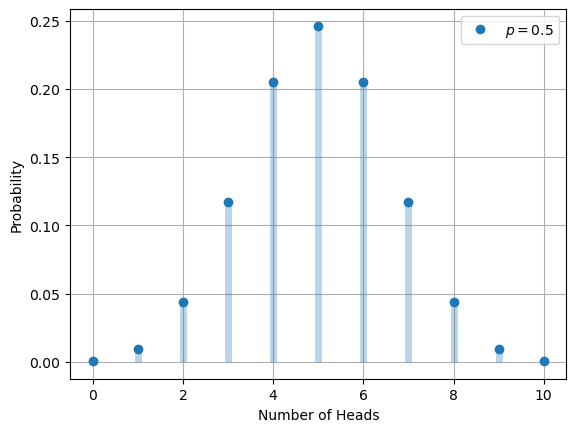

In [27]:
from scipy.stats import binom
import matplotlib.pyplot as plt

x = range(0,11)
n = 10
p = 0.5

pmf = binom.pmf(x, n, p)

plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.plot(x, pmf, 'o', label=r'$p=0.5$')
plt.vlines(x, 0, pmf, lw=5, alpha=.3)
plt.legend()
plt.grid();

In [29]:
import pandas as pd

df_p = pd.DataFrame(pmf)
df_p.T.round(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.01,0.04,0.12,0.21,0.25,0.21,0.12,0.04,0.01,0.0


In [30]:
mean = binom.mean(n, p) # Mean of the distribution
std = binom.std(n, p)   # Standard deviation of the distribution

print(mean)
print(round(std, 2))

5.0
1.58


Given an unfair coin, e.g. with $p = 0.3$, we get this non-symetric distribution:

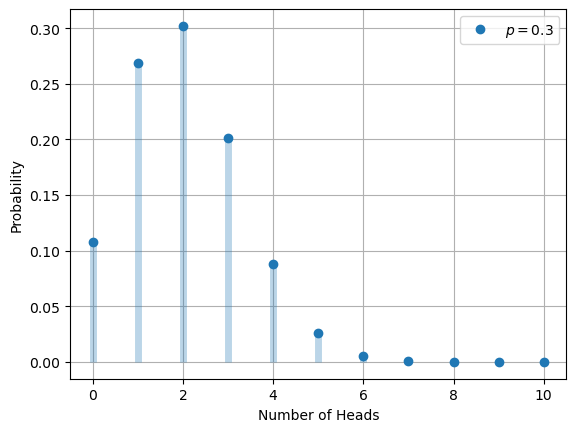

In [31]:
x = range(0,11)
n = 10
p = 0.2    # unfair coin

plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.plot(x, binom.pmf(x, n, p), 'o', label=r'$p=0.3$')
plt.vlines(x, 0, binom.pmf(x, n, p), lw=5, alpha=.3)
plt.legend()
plt.grid();

In [32]:
mean = binom.mean(n, p) # Mean of the distribution
std = binom.std(n, p)   # Standard deviation of the distribution

print(mean)
print(round(std, 2))

2.0
1.26


In order to **simulate** the result, we could generate that using a binomially distributed random variable with `np.random.binomial(n, p)`:

In [33]:
import numpy as np

runs = 10000
x = 6
n = 10
p = 0.5

prob = sum([1 for i in np.random.binomial(n, p, size=runs) if i == x]) / runs
print(f'Given {n} flips of a fair coin, the probability of getting {x} heads is: {str(prob)}')

Given 10 flips of a fair coin, the probability of getting 6 heads is: 0.2108


### Real World Example

This example is from [Fun with the Binomial Distribution](https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b).

Given a call-center where each employee does $n = 50$ calls a day and converts $p = 4\%$ of these calls into success (hence **binominal distribution**). Each successful call yields a revenue of 100€. The call center has 100 employees and each employee earns a wage of 200€ / day.

Questions: 

* *Given $n$ and $p$, how high is the total profit per day?* and 
* *How can $n$ and $p$ varied in order to increase the profit?*

In [34]:
np.random.seed(1)

n = 50
p = 0.04
revenue = 100
employees = 100
wage = 200

conversions = np.random.binomial(n, p, size=employees)  # conversions per day of the call-center

print(f'total profit for {p * 100}% is {np.sum(conversions) * revenue - employees * wage}€')

total profit for 4.0% is 0€


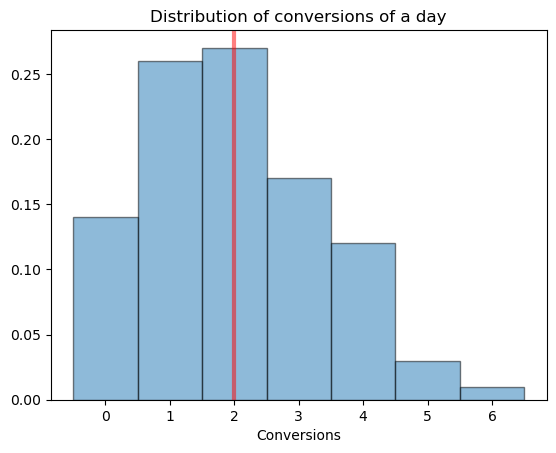

In [35]:
import matplotlib.pyplot as plt

mean = np.mean(conversions)
std = np.std(conversions)

bins = np.arange(0, conversions.max() + 1.5) - 0.5
plt.title('Distribution of conversions of a day')
plt.xlabel('Conversions')
plt.hist(conversions, density=True, bins=bins, edgecolor='k', alpha=0.5)
plt.axvline(mean, color='red', lw=3, alpha=0.5);

Summing up this **(i.i.d.; independent and identically distributed) random variable** for 1000 days yields, due to the **central limit theorem** (CLT; German: _Zentraler Grenzwertsatz_), to a normal distribution.

For $p = 4\%$ and $p = 5\%$ we get:

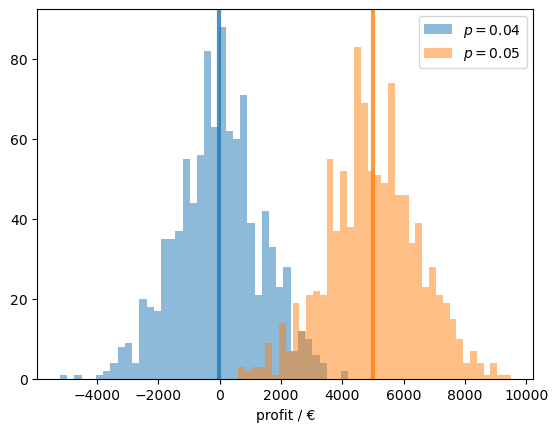

In [36]:
def profits(n, p):
    return [np.sum(np.random.binomial(n, p, size=employees)) * revenue - employees * wage for _ in range(1000)]

profits_4 = profits(50, 0.04)
plt.hist(profits_4, bins=40, alpha=0.5, label=r'$p = 0.04$')
plt.axvline(np.mean(profits_4), lw=3, alpha=0.8);

profits_5 = profits(50, 0.05)
plt.hist(profits_5, bins=40, alpha=0.5, label=r'$p = 0.05$')
plt.axvline(np.mean(profits_5), color='#ff7f0e', lw=3, alpha=0.8);

plt.xlabel('profit / €')
plt.legend();

In [37]:
n = 50
p = 0.05
revenue = 100
employees = 100
wage = 200

conversions = np.random.binomial(n, p, size=employees)  # conversions per day of the call-center

print(f'total profit for {p * 100}% is {np.sum(conversions) * revenue - employees * wage}€')

total profit for 5.0% is 6300€


## Poisson Distribution

The Poisson distribution is best understood as a the **limit** of a **sequence of Binomial distributions**.

# Inferential Statistics

### Descriptive Statistics vs. Inferential Statistics

Given a **sample** (or subset) from a **population**, you can measure a couple of variables and do all kinds of computations which are called **statistics**:

* You can do **univariate analyses** and compute **modes**, **means**, and **standard deviations**. 
* You can do **bivariate analyses** and compute **Pearson’s r correlation**, **coefficients** or do **regression** analyses.

In general, the methods for summarizing sample data are called **descriptive statistics** (German: _Beschreibende Statistik_).

Typically we are not interested in summaries of a specific sample, but in the entire underlying population. **Inferential statistics** (German: _mathematische Statistik_) enables to draw conclusions about the **population parameters** based on an analysis of a **sample**.

**Statistics** are displayed by **Roman letters**, for example $\bar{x}$ is the **mean** in a sample and $s$ is the **standard deviation** in a sample.

**Parameters** are displayed by **Greek letters**, for example $\mu$ stands for the **mean** in a population and $\sigma$ for the **standard deviation** in a population.

Inferential statistics and probability theory are also called **Stochastics**.

### Sampling Distributions

A sample is a **subset of a population**. A representative sample should have no **bias**.

The distribution that you get if you draw an **infinite number** of samples from your population and compute the mean of all the
collected sample means is calles the **sampling distribution** of the **sample mean**. This distribution is in fact a theoretical distribution.

This differs from the **sample distribution**, which is the distribution of scores in the **one sample**.

The **mean of the sampling distribution** $\mu_{\bar{x}}$ is equal to the **mean of the population distribution** $\mu$:

$$
\mu_{\bar{x}} = \mu
$$

The **standard deviation** of the **sampling distribution** is also called the **standard error** and is:

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$

### The Sample Proportion

Often sampling is done in order to estimate the **proportion of a population** that has a specific characteristic (for example the percentage of people making a purchase when entering a store). 

The **population proportion** is denoted by $p$, the **sample proportion** is denoted $\hat{p}$. 

The **sample proportion** is a **random variable** denoted by $\hat{P}$. Given a random samples of size $n$ drawn from a population having the proportion $p$ for the characteristic of interest. 

Then the **mean** $\mu_{\hat{P}}$ of the **sample proportion** $\hat{P}$ is

$$
\mu_{\hat{P}} = p
$$

and the **standard deviation** $\sigma_{\hat{P}}$ is

$$
\sigma_{\hat{P}} = \sqrt{\frac{p \, (1 - p)}{n}}
$$

For **large samples**, the **sample proportion** is approximately **normally distributed**, with mean $\mu_{\hat{P}}$ and standard deviation $\sigma_{\hat{P}}$.

### Central Limit Theorem (CLT)

The central limit theorem (German: _Zentraler Grenzwertsatz_) says that, provided that the sample size is sufficiently large, the sampling
distribution of the sample mean $\bar{x}$ has an **approximately normal distribution**. Even if the variable of interest is **not** normally distributed in the population.

The **mean of the sampling distribution** $\mu_{\bar{x}}$ is equal to the **mean of the population distribution** $\mu$:

$$
\mu_{\bar{x}} = \mu
$$

The **standard deviation of the sampling distribution** $\sigma_{\bar{x}}$ is

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt n}
$$

with the **standard deviation in the population** $\sigma$ and the **sample size** $n$.

This means: the larger the variability in the population, the larger the variability of the sample means. And that a larger
sample size $n$ leads to a lower standard deviation of the sampling distribution.

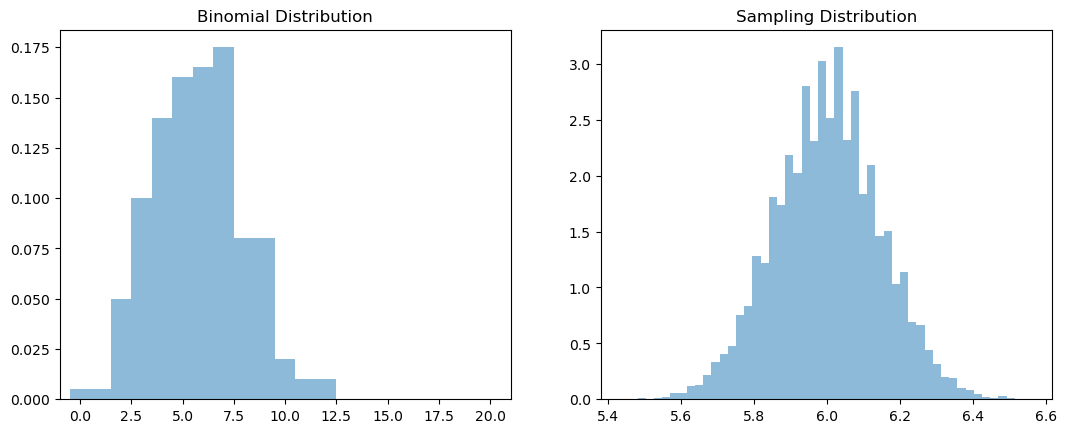

In [38]:
import numpy as np
import matplotlib.pyplot as plt

n = 20
p = 0.3
rsd = np.random.binomial(n, p, size=200)                                      # random (binominal) right-skewed data
sid = [np.mean(np.random.binomial(n, p, size=200)) for _ in range(20000)]     # sampling distribution for 20000 samples 

plt.figure(figsize=(12.8, 4.8))
plt.subplot(1,2,1) 
plt.title('Binomial Distribution')
plt.hist(rsd, density=True, bins=np.arange(0, rsd.max() + 1.5) - 0.5, alpha=0.5)
plt.xlim(-1, n + 1)
plt.subplot(1,2,2) 
plt.title('Sampling Distribution')
plt.hist(sid, density=True, bins=50, alpha=0.5)
plt.show()

## Confidence Interval

The **95% confidence interval**, tells us that we can be 95% confident that our point estimate, which could be a **mean** or a **proportion**, falls within our confidence interval. 

Or in other words, it tells us that if we would draw an infinite number of samples we would compute a 95% confidence interval with a similar margin of error. In 95% of the cases, the population value would fall within this confidence interval.

### Constructing a Confidence Interval

1. Decide which confidence level you want to use. For instance, do you settle for the **regular 95% level**? Or do you want to be **more confident and less precise**? Or **more precise and less confident**? 

2. Decide if you're dealing with a **proportion** or a **mean**. If you're interested in a **proportion**, you work with the **z-distribution**, and if you're interested in a **mean**, you have to use the **t-distribution**. If you're interested in a **mean**, you should also compute the **degrees of freedom** which is $n - 1$. 

3. Compute the **endpoints** of the confidence interval. 

4. Interpret the results substantively.

### Confidence Interval for Proportion

If you draw an **infinite number** of samples with $n = 100$ from a **population**, and for every sample we would compute **confidence intervals**

$$
\text{CI}_p = p \, \pm \, z_{95\%} \sqrt{\frac{p \, (1 - p)}{n}}
$$

with

$$
\begin{align}
z_{90\%} &= 1.645 \\
z_{95\%} &= 1.96 \\
z_{99\%} &= 2.58
\end{align}
$$

then in 95% of the cases the **population** value would fall within the confidence interval. Or, in other words, you are **95% confident** that the **population proportion** falls between these confidence intervals.

The more confident we are that we draw a correct inference, the larger of margin of error. That means, that we have to compromise between **confidence** and **precision**.

### Confidence Interval of Population Mean

The confidence interval to estimate a **population mean** is

$$
\text{CI}_{\bar{x}} = \bar{x} \, \pm \, t_{95\%} \frac{s}{\sqrt n}
$$

with the **degree of freedom** $\text{df} = n - 1$, and the **t-scores**

$$
\begin{align}
t_{90\%} &= 1.6525 \\
t_{95\%} &= 1.9720
\end{align}
$$

When comparing means of continuous variables with **small samples**, we use a **t-distribution** instead of the **normal distribution**.

### Choosing the Sample Size

The choice for your **sample size** depends on

1. how precise you would like to be: how large do you allow your **margin of error** $m$? The smaller you want the margin of error to be, the larger your sample size should be.

2. The sample size depends on the **confidence level** you want to use: with the larger confidence level, you also need a larger sample size.

3. The sample size depends on the **variability** in your data: the larger the standard deviation of your variable is, the larger your sample size should be.

#### Sample Size for Means

The **size** $n$ of your **sample** is

$$
n = \frac{\sigma^2 \cdot z^2}{m^2}
$$

As you don't know your **sample standard deviation** you need to estimate this value by means of an **educated guess**.

#### Sample Size for Proportions

The **size** $n$ of your **sample** is

$$
n = \frac{p \, (1 - p) \cdot z^2}{m^2}
$$

## Correlation and Regression

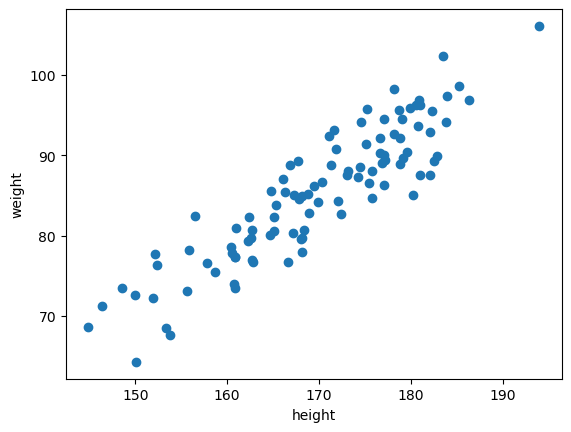

In [39]:
plt.scatter(df['height'], df['weight'])
plt.xlabel('height')
plt.ylabel('weight');

In [40]:
df

,height,weight,age,gender,height_bins,weight_bins
0,151.9,72.3,23,M,"(149, 159]","(69, 79]"
1,156.5,82.4,30,M,"(149, 159]","(79, 89]"
2,153.3,68.5,21,M,"(149, 159]","(59, 69]"
3,160.9,77.4,30,F,"(159, 169]","(69, 79]"
4,170.3,86.7,29,F,"(169, 179]","(79, 89]"
...,...,...,...,...,...,...
95,182.3,95.5,22,F,"(179, 189]","(89, 99]"
96,172.4,82.7,29,M,"(169, 179]","(79, 89]"
97,165.1,80.6,28,M,"(159, 169]","(79, 89]"
98,161.0,80.9,21,F,"(159, 169]","(79, 89]"


### Covariance

The **sample covariance** is a measure of the joint variability of **two random variables** $x$ and $y$:

$$
\text{cov}(X,Y) = \frac{1}{n-1} \sum{(x-\hat{x})(y-\hat{y})}
$$

The covariance is **positive** if the variables tend to show **similar linear behavior**. The covariance is **negative** if the variables tend to show **opposite linear behavior**. The covaraince is **zero** if there is **no linear relationship** between the variables.

The covariance is **not normalized** and depend on the magnitudes of the variables, hence the magnitude is not easy to interpret.

### Covariance Matrix

The **diagonal** of the covariance matrix provides the **variance** $\text{var}(X)$ of each individual variables covariance itself. The **off-diagonal** entries in the matrix provide the **covariance** $\text{cov}(X, Y)$ between each variable pair.

A covariance matrix is **symmetric** ($A = A^{T}$) and **positive semidefinite** ($A \geq 0$: all eigenvalues are non negative).


In [41]:
covMatrix = df[['height', 'weight']].cov()
covMatrix

,height,weight
height,104.652181,76.226474
weight,76.226474,68.293595


### Correlation

The correlation coefficient is the **normalized** version of the covariance and shows by its magnitude the strength of the linear relation.



In [42]:
corrMatrix = df[['height', 'weight']].corr(method='pearson')
corrMatrix

,height,weight
height,1.000000,0.901658
weight,0.901658,1.000000


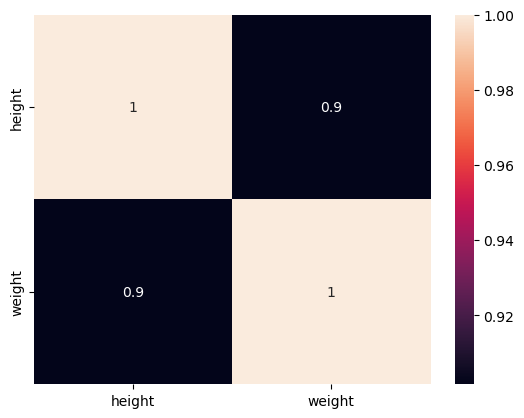

In [43]:
sns.heatmap(corrMatrix, annot=True);

### Pearson's r value

Pearson's $r$ value, or **correlation** value, quantifies the **strength of a relationship**.

$$
r = \frac{\text{cov}(X, Y)}{\sqrt{\text{var}(X)} \sqrt{\text{var}(Y)}} =  \frac{\text{cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

$r = 1$ and $r = -1$ means that the values are **strongly correlated** with a positive or naegative slope. 

$r = 0$ mean that the values are **not correlated** at all.

The correlation value is **scale invariant**.

In [44]:
covMatrix

,height,weight
height,104.652181,76.226474
weight,76.226474,68.293595


In [45]:
r = covMatrix.at['height','weight'] / (df['height'].std() * df['weight'].std())
r

0.9016577106690004

### Linear Regression

Linear regression is a **linear** approach to modelling the relationship between a scalar **dependent variable** (also called feature or target) and one or more explanatory **independent variables**.

The case of one explanatory variable is called **simple linear regression**; for more than one, the process is called **multiple linear regression**. This term is distinct from **multivariate linear regression**, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

The linear regression **model** is described with the coefficients $\theta_0$ (intercept) and $\theta_1$ (slope):

$$
\hat{y} = \theta_0 + \theta_1 x
$$

There are two ways to determine $\theta$, an **analytical** solution and a **numerical** approximation method called gradient descent. The numerical solution is recommended for large datasets.

#### Analytical Solution

Let $X$ signify the **independent data**:

$$
X = \begin{bmatrix}1 & x_1 \\  \vdots & \vdots \\ 1 & x_n \end{bmatrix}
$$

Let $y$ signify **observed values** (the target, aka the thing we’re trying to predict):

$$
y = \begin{pmatrix}y_1 \\ \vdots \\ y_n \end{pmatrix}
$$

then we calculate the coefficiennts $\theta$ with:

$$
\hat{\theta} = \begin{pmatrix}\theta_0, \theta_1 \end{pmatrix} = (X^\top X)^{-1} X^\top y 
$$

In [46]:
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares'''
    return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

X = np.c_[np.ones(df['height'].shape[0]), df['height']]
y = df['weight']

theta = ols(X,y)
print(f'intercept: {theta[0]} | slope: {theta[1]}')

intercept: -38.33666841115337 | slope: 0.728379219131341


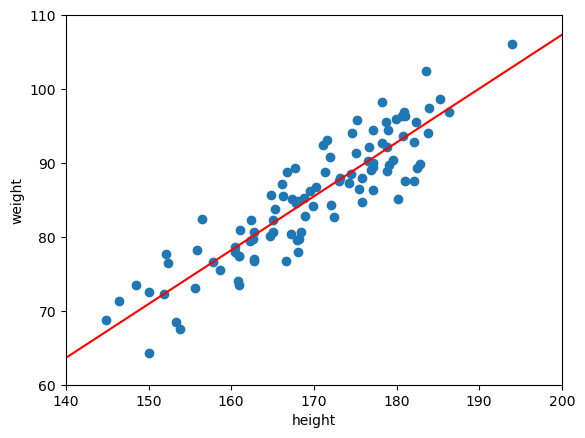

In [47]:
plt.scatter(df['height'], df['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.xlim(140, 200)
plt.ylim(60, 110)
plt.axline((0, theta[0]), slope=theta[1], c='r');

#### Numerical Solution

In [49]:
from sklearn.linear_model import LinearRegression

X = np.array(df['height']).reshape(-1, 1)
y = df['weight']

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

print(f'intercept: {lr.intercept_}')
print(f'slope: {lr.coef_[0]}')

intercept: -38.33666841113377
slope: 0.7283792191312637


### R Squared

The square of the correlation $\text{r}^2$, called the coefficient of determination, is the proportion of the variation in the $y$ variable thet is predicted, or explained, by the $x$ variable. 

For example when predicting grades, then $\text{r}^2 = 0.69$ says that $69 \%$ of the variance in the grades can be predicted by the time spend learning.

$\text{r}^2$ tells you how much better a **regression line** predicts the value of a dependent variable than the **mean** of the variable. For example $\text{r}^2 = 0.69$ says that the prediction error is $69 \%$ smaller than when you use the mean.

$\text{r}^2$ is easier to interpret as $\text{r}$. For example it is not obvious that $\text{r} = 0.7$ is twice as good as $\text{r}^2 = 0.5$.

In [50]:
print(f'r = {r}')
print(f'r^2 = {r**2}')

r = 0.9016577106690004
r^2 = 0.8129866272088627


$\text{r}^2$ can also be calculated and interpretes as

$$
\text{r}^2 = 1 - \frac{\text{SSE}}{\text{SSE}}
$$

with **Sum of Squared Errors**:

$$
\text{SSE} = \sum_i^n{(y_i - \hat{y_i})^2}
$$

and **Total Sum of Squares**:

$$
\text{SST} = \sum_i^n{(y_i - \overline{y})^2}
$$

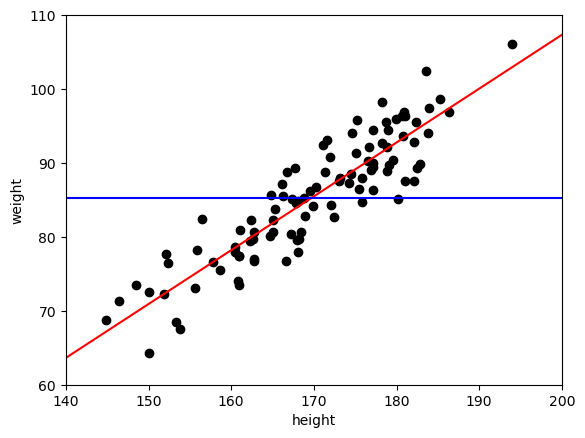

In [51]:
plt.scatter(df['height'], df['weight'], c='k')
plt.xlabel('height')
plt.ylabel('weight')
plt.xlim(140, 200)
plt.ylim(60, 110)
plt.axline((0, theta[0]), slope=theta[1], c='r');
plt.axline((0, df['weight'].mean()), slope=0, c='b');

hence

$$
\begin{align}
\text{r}^2 &= 1 - \, \frac{\text{var}\,(\color{red}{\text{regression}})}{\text{var}\,(\color{blue}{\text{mean}})} \\ \\
&= \frac{\text{var}\,(\color{blue}{\text{mean}}) - \text{var}\,(\color{red}{\text{regression}})}{\text{var}\,(\color{blue}{\text{mean}})}
\end{align}
$$

In [52]:
var_mean = df['weight'].var()
var_regression = np.sum((df['weight'] - lr.predict(df['height'].values.reshape(-1,1)))**2) / (df['weight'].size - 1)

r2 = (var_mean - var_regression) / var_mean
r2

0.8129866272088621

This can be interpreted as: There is **81,3% less variation** around the regression line than around the mean line.

#### Why $\text{r}^2$ is a Poor Metric

$\text{r}^2$ will go up when additional features are added, even if those features provide the model no new predictive power.

### Example

Data is from [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

SuicideRate = pd.read_csv('data/suicide-rates-overview-1985-to-2016.csv.zip', compression='zip')

In [54]:
SuicideRate.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [60]:
population = SuicideRate['population']
suicides_no = SuicideRate['suicides_no']

pearsoncorr = population.corr(suicides_no, method='pearson')
pearsoncorr

0.6161622675219283

# TODO

* https://dfrieds.com/math/bessels-correction.html#Bessel's-Correction
* https://www.youtube.com/watch?v=f-6RRsRiPDc
* https://www.youtube.com/watch?v=IaSfvJu5f9I